In [1]:
import pandas as pd
s=pd.read_csv(r"C:\Users\hanal\Downloads\diabetes (1).csv")
s

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df_p=s.pivot(index='Glucose',value_vars=['Outcome'])
df_p

TypeError: DataFrame.pivot() got an unexpected keyword argument 'value_vars'

In [ ]:
dff=pd.read_csv(r"C:\Users\hanal\Downloads\diabetes (1).csv")
dff.head()

                                CROSS - VALIDATION (kfold)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
x=dff.iloc[:,:-1]
y=dff.iloc[:,-1]


In [3]:
lr=LogisticRegression()
lr.fit(x,y)
k_f=KFold(n_splits=5)
sc=cross_val_score(lr,x,y,cv=k_f)
print('scores for 5 folds : ',sc)
print('mean of scores : ',sc.mean())

NameError: name 'LogisticRegression' is not defined

                                NORMALIZATION

In [4]:
import pandas as pd

df=pd.read_csv(r"C:\Users\hanal\Downloads\diabetes (1).csv")
df.head()
#d=df.copy


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


MIN-MAX

In [5]:
mm=df.copy()
for i in mm.columns:
        mm_n=(mm-mm.min())/(mm.max()-mm.min())
mm_n.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.preprocessing import StandardScaler as ss

In [7]:
x=mm_n.iloc[:,:-1]
y=mm_n.iloc[:,-1]


In [8]:
x_tr,x_te,y_tr,y_te=tt(x,y,random_state=42)
svc=SVC(kernel='linear')
svc.fit(x_tr,y_tr)
y_p=svc.predict(x_te)
ac11=acc(y_te,y_p)

In [9]:
ac11

0.75

In [10]:
r=rf(random_state=42)
r.fit(x_tr,y_tr)
y_p1=r.predict(x_te)
ac12=acc(y_te,y_p1)


In [11]:
ac12

0.7395833333333334

Z-SCORE

In [12]:
zsc=df.copy()
for i in zsc.columns:
    zsc_n=(zsc-zsc.mean())/zsc.std()
zsc_n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006


In [13]:
x=zsc_n.iloc[:,:-1]
y=zsc_n.iloc[:,-1]
y_b = (y >=0.5).astype(int)
x_tr,x_te,y_tr,y_te=tt(x,y_b,random_state=42)
svc=SVC(kernel='linear')
svc.fit(x_tr,y_tr)
y_p=svc.predict(x_te)
ac21=acc(y_te,y_p)

In [14]:
ac21

0.7291666666666666

In [15]:
r=rf(random_state=42)
r.fit(x_tr,y_tr)
y_p1=r.predict(x_te)
ac22=acc(y_te,y_p1)


In [16]:
ac22

0.734375

DECIMAL SCALING

In [17]:
def dec(d):
    for  i in d:
        p=d[i].max()
        q=len(str(abs(p)))
        d[i]=d[i]/10**q
    return d

In [18]:
dd=df.copy()
decm=dec(dd)
decm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.06,0.148,0.072,0.35,0.000,0.00336,0.000063,0.50,0.1
1,0.01,0.085,0.066,0.29,0.000,0.00266,0.000035,0.31,0.0
2,0.08,0.183,0.064,0.00,0.000,0.00233,0.000067,0.32,0.1
3,0.01,0.089,0.066,0.23,0.094,0.00281,0.000017,0.21,0.0
4,0.00,0.137,0.040,0.35,0.168,0.00431,0.000229,0.33,0.1


In [19]:
x=decm.iloc[:,:-1]
y=decm.iloc[:,-1]
y_b = (y >=0.1).astype(int)
x_tr,x_te,y_tr,y_te=tt(x,y_b,random_state=42)
svc=SVC(kernel='linear')
svc.fit(x_tr,y_tr)
y_p=svc.predict(x_te)
ac31=acc(y_te,y_p)

In [20]:
ac31

0.6458333333333334

In [21]:
r=rf(random_state=42)
r.fit(x_tr,y_tr)
y_p1=r.predict(x_te)
ac32=acc(y_te,y_p1)


In [22]:
ac32

0.7447916666666666

LOGARITHMIC TRANSFORMAtION

In [23]:
import seaborn as sns
import numpy as np
df=pd.read_csv(r"C:\Users\hanal\Downloads\diabetes (1).csv")
df.var()
df['SkinThickness'].mean()


20.536458333333332

In [24]:
df['Insulin'].replace(0, 79,inplace=True)
df['Insulin'] = np.log(df['Insulin'])
df['Pregnancies'].replace(0, 4,inplace=True)

C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\1408308723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insulin'].replace(0, 79,inplace=True)
C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\1408308723.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [25]:
df.var()


Pregnancies                    8.883269
Glucose                     1022.248314
BloodPressure                374.647271
SkinThickness                254.473245
Insulin                        0.298401
BMI                           62.159984
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

In [26]:
df['Glucose'].replace(-np.inf, 120,inplace=True)
df['Glucose'].replace(0,120,inplace=True)
df['Glucose']=np.log(df['Glucose'])

C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\1006462635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].replace(-np.inf, 120,inplace=True)
C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\1006462635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [27]:
df.var()


Pregnancies                   8.883269
Glucose                       0.062355
BloodPressure               374.647271
SkinThickness               254.473245
Insulin                       0.298401
BMI                          62.159984
DiabetesPedigreeFunction      0.109779
Age                         138.303046
Outcome                       0.227483
dtype: float64

In [28]:
df['SkinThickness'].mean()

20.536458333333332

In [29]:
 df['SkinThickness'].replace(-np.inf, 2,inplace=True)
df['SkinThickness'].replace(0, 20,inplace=True)
df['SkinThickness']=np.log(df['SkinThickness'])
df.var()

C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\3903935797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].replace(-np.inf, 2,inplace=True)
C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\3903935797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Pregnancies                   8.883269
Glucose                       0.062355
BloodPressure               374.647271
SkinThickness                 0.126251
Insulin                       0.298401
BMI                          62.159984
DiabetesPedigreeFunction      0.109779
Age                         138.303046
Outcome                       0.227483
dtype: float64

In [30]:
df['BloodPressure'].replace(0, df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].replace(-np.inf, df['SkinThickness'].mean(),inplace=True)
df['BloodPressure']=np.log(df['BloodPressure'])
df.var()

C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\2992917319.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].replace(0, df['BloodPressure'].mean(),inplace=True)
C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\2992917319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Pregnancies                   8.883269
Glucose                       0.062355
BloodPressure                 0.030575
SkinThickness                 0.126251
Insulin                       0.298401
BMI                          62.159984
DiabetesPedigreeFunction      0.109779
Age                         138.303046
Outcome                       0.227483
dtype: float64

In [31]:
df['BMI'].replace(0, df['BMI'].mean(),inplace=True)
df['BMI']=np.log(df['BMI'])
df.var()

C:\Users\hanal\AppData\Local\Temp\ipykernel_20856\2123924329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].replace(0, df['BMI'].mean(),inplace=True)


Pregnancies                   8.883269
Glucose                       0.062355
BloodPressure                 0.030575
SkinThickness                 0.126251
Insulin                       0.298401
BMI                           0.044444
DiabetesPedigreeFunction      0.109779
Age                         138.303046
Outcome                       0.227483
dtype: float64

In [32]:

df['Age']=np.log(df['Age'])
df.var()


Pregnancies                 8.883269
Glucose                     0.062355
BloodPressure               0.030575
SkinThickness               0.126251
Insulin                     0.298401
BMI                         0.044444
DiabetesPedigreeFunction    0.109779
Age                         0.104137
Outcome                     0.227483
dtype: float64

In [223]:
df['Pregnancies'].replace(0, 4,inplace=True)
df['Pregnancies']=np.log(df['Pregnancies'])
df.var()

C:\Users\hanal\AppData\Local\Temp\ipykernel_18452\2940110663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pregnancies'].replace(0, 4,inplace=True)


Pregnancies                 0.552182
Glucose                     0.062355
BloodPressure               0.030575
SkinThickness               0.126251
Insulin                     0.298401
BMI                         0.044444
DiabetesPedigreeFunction    0.109779
Age                         0.104137
Outcome                     0.227483
dtype: float64

In [224]:
df['Pregnancies'].replace('NaN', 4,inplace=True)
df.head()


C:\Users\hanal\AppData\Local\Temp\ipykernel_18452\3148523950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pregnancies'].replace('NaN', 4,inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.791759,4.997212,4.276666,3.555348,4.369448,3.514526,0.627,3.912023,1
1,0.000000,4.442651,4.189655,3.367296,4.369448,3.280911,0.351,3.433987,0
2,2.079442,5.209486,4.158883,2.995732,4.369448,3.148453,0.672,3.465736,1
3,0.000000,4.488636,4.189655,3.135494,4.543295,3.335770,0.167,3.044522,0
4,1.386294,4.919981,3.688879,3.555348,5.123964,3.763523,2.288,3.496508,1


In [225]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_tr,x_te,y_tr,y_te=tt(x,y,random_state=42)
svc=SVC(kernel='linear')
svc.fit(x_tr,y_tr)
y_p=svc.predict(x_te)
ac41=acc(y_te,y_p)

In [226]:
ac41

0.734375

In [227]:
r=rf(random_state=42)
r.fit(x_tr,y_tr)
y_p1=r.predict(x_te)
ac42=acc(y_te,y_p1)


In [228]:
ac42

0.7604166666666666

ROOT TRANSFORMATION

In [231]:
ddf=pd.read_csv(r"C:\Users\hanal\Downloads\diabetes (1).csv")

In [229]:
def rt(sd):
    return np.sqrt(sd)

In [232]:
ddf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [233]:
r_d=rt(ddf)

In [234]:
r_d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.449490,12.165525,8.485281,5.916080,0.000000,5.796551,0.791833,7.071068,1.0
1,1.000000,9.219544,8.124038,5.385165,0.000000,5.157519,0.592453,5.567764,0.0
2,2.828427,13.527749,8.000000,0.000000,0.000000,4.827007,0.819756,5.656854,1.0
3,1.000000,9.433981,8.124038,4.795832,9.695360,5.300943,0.408656,4.582576,0.0
4,0.000000,11.704700,6.324555,5.916080,12.961481,6.565059,1.512614,5.744563,1.0
...,...,...,...,...,...,...,...,...,...
763,3.162278,10.049876,8.717798,6.928203,13.416408,5.735852,0.413521,7.937254,0.0
764,1.414214,11.045361,8.366600,5.196152,0.000000,6.066300,0.583095,5.196152,0.0
765,2.236068,11.000000,8.485281,4.795832,10.583005,5.118594,0.494975,5.477226,0.0
766,1.000000,11.224972,7.745967,0.000000,0.000000,5.486347,0.590762,6.855655,1.0


In [237]:
x=ddf.iloc[:,:-1]
y=ddf.iloc[:,-1]

x_tr,x_te,y_tr,y_te=tt(x,y,random_state=42)
svc=SVC(kernel='linear')
svc.fit(x_tr,y_tr)
y_p=svc.predict(x_te)
ac51=acc(y_te,y_p)

In [238]:
ac51

0.7291666666666666

In [241]:
r=rf(random_state=42)
r.fit(x_tr,y_tr)
y_p1=r.predict(x_te)
ac52=acc(y_te,y_p1)


In [240]:
ac52

0.734375

In [245]:
final={'SVC':[ac11,ac21,ac31,ac41,ac51],
      'RandomForest':[ac12,ac22,ac32,ac42,ac52]}


In [247]:
f_df= pd.DataFrame(final,index=['MIN_MAX','Z_Score','DecimalScaling','Log','Root'])
f_df

,SVC,RandomForest
MIN_MAX,0.750000,0.739583
Z_Score,0.729167,0.734375
DecimalScaling,0.645833,0.744792
Log,0.734375,0.760417
Root,0.729167,0.734375


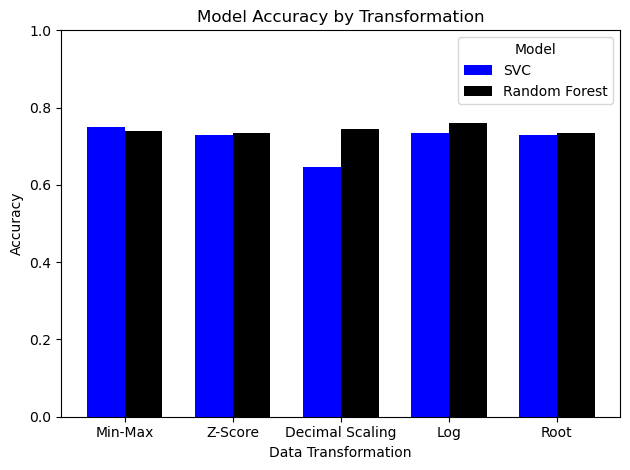

In [255]:
import matplotlib.pyplot as plt
t = ['Min-Max', 'Z-Score', 'Decimal Scaling', 'Log', 'Root']
svc_accuracy = [ac11, ac21, ac31, ac41,ac51]
rf_accuracy = [ac12, ac22, ac32, ac42,ac52]
bar_width = 0.35
x = np.arange(len(transformations))
plt.bar(x - bar_width/2, svc_accuracy, width=bar_width, label='SVC', color='blue')
plt.bar(x + bar_width/2, rf_accuracy, width=bar_width, label='Random Forest', color='black')
plt.xlabel('Data Transformation')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Transformation')
plt.xticks(x, transformations) 
plt.ylim(0, 1) 
plt.legend(title='Model')
plt.tight_layout()
plt.show()

                                                        PR - CURVE

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve as pr
from sklearn.metrics import  auc

C:\Users\hanal\anaconda3\envs\FDS\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


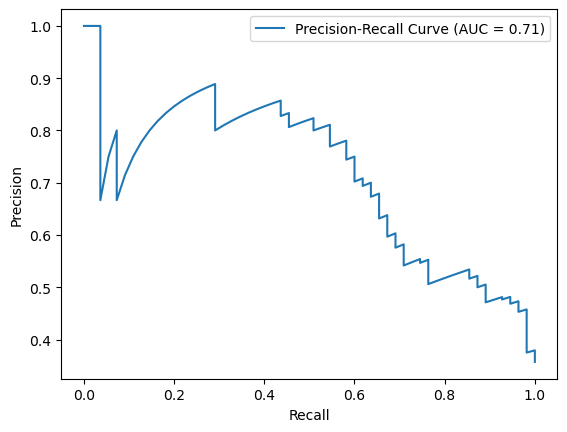

In [259]:
x=ddf.iloc[:,:-1]
y=ddf.iloc[:,-1]


x_train, x_test, y_train, y_test = tt(x, y, test_size=0.2, random_state=42)
m = LogisticRegression()
m.fit(x_train, y_train)
y_p = m.predict_proba(x_test)[:, 1]

p, r, thr= pr(y_test, y_p)

auc_sc = auc(r, p)

plt.plot(r, p, label=f'Precision-Recall Curve (AUC = {auc_sc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()
plt.show()